In [1]:
!pip install gspread oauth2client

In [16]:
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.linear_model import LinearRegression

In [65]:
# Define scope and authenticate
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name("/content/json_key.json", scope)
client = gspread.authorize(creds)

# Open your Google Sheet
sheet = client.open("N2O data").sheet1

##data = sheet.get_all_records()  # Get all data from the sheet
data = pd.DataFrame(sheet.get_all_records())
print(data)

                     Time value1 value2
0     04/12/2024 11:22:18    119     65
1     04/12/2024 11:22:25    119     65
2     04/12/2024 11:22:30    119     65
3     04/12/2024 11:22:37    119     65
4     04/12/2024 11:22:42    119     65
...                   ...    ...    ...
2782  05/12/2024 12:42:59    124     69
2783  05/12/2024 12:43:27    124     69
2784  05/12/2024 12:43:32    124     69
2785  05/12/2024 12:43:39    124     69
2786  05/12/2024 12:43:52    124     69

[2787 rows x 3 columns]


[{'Time': '04/12/2024 11:22:18', 'value1': 119, 'value2': 65}, {'Time': '04/12/2024 11:22:25', 'value1': 119, 'value2': 65}, {'Time': '04/12/2024 11:22:30', 'value1': 119, 'value2': 65}, {'Time': '04/12/2024 11:22:37', 'value1': 119, 'value2': 65}, {'Time': '04/12/2024 11:22:42', 'value1': 119, 'value2': 65}, {'Time': '04/12/2024 11:22:48', 'value1': 118, 'value2': 66}, {'Time': '04/12/2024 11:22:53', 'value1': 118, 'value2': 66}, {'Time': '04/12/2024 11:22:59', 'value1': 118, 'value2': 66}, {'Time': '04/12/2024 11:23:04', 'value1': 118, 'value2': 66}, {'Time': '04/12/2024 11:23:10', 'value1': 118, 'value2': 66}, {'Time': '04/12/2024 11:23:15', 'value1': 118, 'value2': 66}, {'Time': '04/12/2024 11:23:20', 'value1': 117, 'value2': 67}, {'Time': '04/12/2024 11:23:26', 'value1': 117, 'value2': 67}, {'Time': '04/12/2024 11:23:31', 'value1': 117, 'value2': 67}, {'Time': '04/12/2024 11:23:37', 'value1': 117, 'value2': 67}, {'Time': '04/12/2024 11:23:42', 'value1': 116, 'value2': 68}, {'Time'

In [59]:
print(data.head())        # Display the first few rows
print(data.columns)       # Show all column names

                 Time  value1  value2
0 2024-04-12 11:22:18   119.0    65.0
1 2024-04-12 11:22:25   119.0    65.0
2 2024-04-12 11:22:30   119.0    65.0
3 2024-04-12 11:22:37   119.0    65.0
4 2024-04-12 11:22:42   119.0    65.0
Index(['Time', 'value1', 'value2'], dtype='object')


**Model Training (Linear Regression)**

In [47]:
data['Time'] = pd.to_datetime(data['Time'])  # Ensure time is in datetime format
data['value1'] = pd.to_numeric(data['value1'], errors='coerce')  # Convert to numeric
data['value2'] = pd.to_numeric(data['value2'], errors='coerce')



In [49]:
# Assume Value 1 is N2O ppm and Value 2 is temperature
X = data[['value2']]  # Temperature as feature
y = data['value1']    # N2O concentration as target

In [50]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Drop rows with NaN values
data = data.dropna()

# Split the data into features (X) and target (y) again
X = data[['value2']]  # Temperature as the feature
y = data['value1']    # N2O Concentration as the target

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [54]:
# Print model coefficients
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Model Coefficients: [-0.00865608]
Intercept: 134.7643177538078


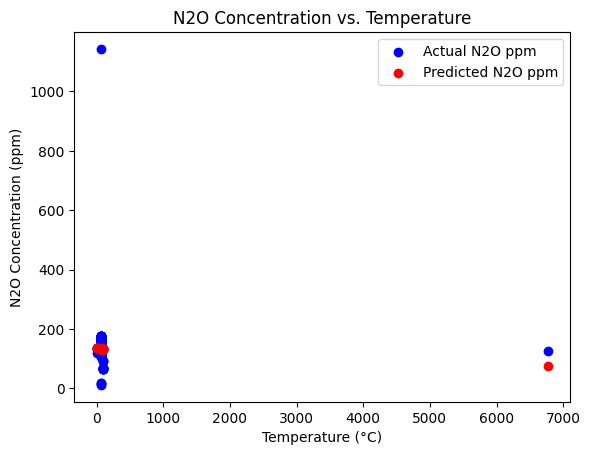

In [62]:
# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual N2O ppm')
plt.scatter(X_test, y_pred, color='red', label='Predicted N2O ppm')
plt.xlabel('Temperature (°C)')
plt.ylabel('N2O Concentration (ppm)')
plt.title('N2O Concentration vs. Temperature')
plt.legend()
plt.show()